In [21]:
!pip install GUROBI

ERROR: Could not find a version that satisfies the requirement GUROBI (from versions: none)
ERROR: No matching distribution found for GUROBI


In [25]:
%run frontera_v3.py

# Rob

In [3]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio

In [4]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [5]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [6]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

In [140]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [141]:
frontera.frontier()

In [144]:
frontera.plot_frontera_2D(0,1)

In [142]:
frontera.plot_Vectors(0,1)

# Leo

In [146]:
%run frontera_v3.ipynb

In [147]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=10, N_points_frontera=41, method='prototypes')

In [148]:
frontera.frontier()

In [149]:
frontera.plot_frontera_2D(0,1)

# LSH

In [275]:
%run frontera_v3.ipynb

In [276]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [277]:
frontera.frontier()

In [278]:
frontera.centroids

{'Centroid Group: 0': array([0.21212615, 2.86599585]),
 'Centroid Group: 2': array([-0.32643995,  3.82205802]),
 'Centroid Group: 3': array([1.69274527, 2.72707496]),
 'Centroid Group: 4': array([-0.21022229,  2.21540647]),
 'Centroid Group: 5': array([1.18850457, 1.44977457])}

In [279]:
frontera.plot_frontera_2D(0,1)

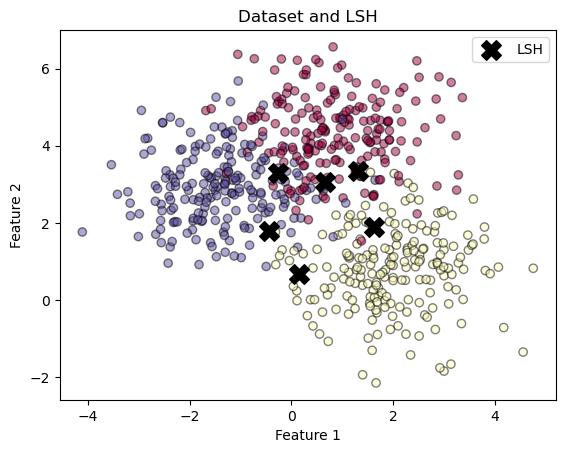

In [239]:
centroid_arrays = np.array(list(frontera.centroids.values()))

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(centroid_arrays[:, 0], centroid_arrays[:, 1], c='black', marker='X', s=200, label='LSH')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and LSH')

# Show the plot
plt.show()


# MNIST

In [ ]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0])
# y_test_col = y_test.reshape(1, y_test.shape[0])

train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))


In [ ]:
frontera = Frontera(x_train_flat,y_train_col,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [ ]:
frontera.frontier()

### prototypes

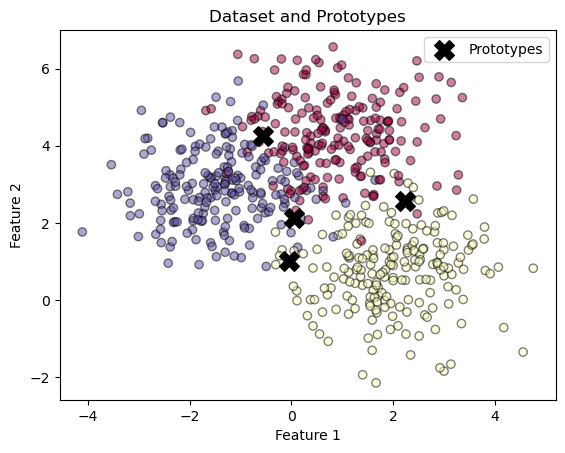

In [114]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()